<a href="https://colab.research.google.com/github/andressriosg/Topicos-en-Estadistica/blob/main/Solucion_ejercicio_1_taller_para_tercer_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd # Descargamos todos los paquetes y librerías que vamos a utilizar
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from google.colab import files # Para cargar archivos en google colab
import io
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
uploaded = files.upload()

Saving fetal2020.csv to fetal2020.csv


In [10]:
tabla = pd.read_csv(io.BytesIO(uploaded['fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')
tabla.head(4)

<ipython-input-10-88f63d324e7d>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')


,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTEB,C_MUERTEC,C_MUERTED,C_MUERTEE,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,1,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80


In [26]:
df = tabla[["IDPROFCER", "P_PMAN_IRIS", "PESO_NAC", "T_GES"]]
df["T_GES"].head(5)

COD_DPTO
70    1
11    1
11    2
11    1
11    3
Name: T_GES, dtype: int64

In [37]:
df['T_GES'] = df['T_GES'].astype(str)
df['P_PMAN_IRIS'] = df['P_PMAN_IRIS'].astype(str)
df["T_GES"].head(5)

<ipython-input-37-31e48aecf6d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['T_GES'] = df['T_GES'].astype(str)
<ipython-input-37-31e48aecf6d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P_PMAN_IRIS'] = df['P_PMAN_IRIS'].astype(str)


COD_DPTO
70    1
11    1
11    2
11    1
11    3
Name: T_GES, dtype: object

In [38]:
df.head(5)

,IDPROFCER,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,1,nan,9,1
11,1,0.0,1,1
11,1,0.0,1,2
11,1,nan,1,1
11,1,nan,3,3


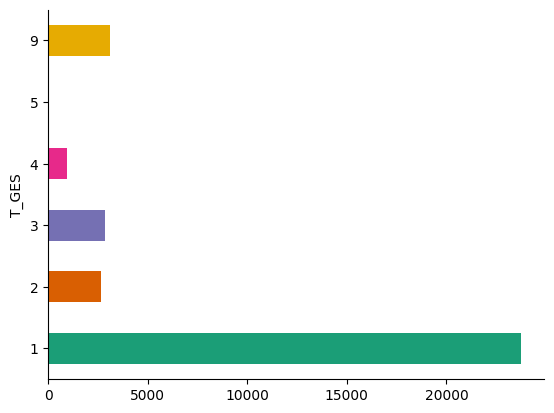

In [16]:
# @title T_GES

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('T_GES').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [40]:
df.loc[(df.P_PMAN_IRIS == "nan"), "P_PMAN_IRIS"] = 6
df.head(2)

,IDPROFCER,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,1,6,9,1
11,1,0.0,1,1


In [46]:
df.P_PMAN_IRIS = df.P_PMAN_IRIS.astype(float)
df["P_PMAN_IRIS"].value_counts()

<ipython-input-46-edd4cafdb188>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.P_PMAN_IRIS = df.P_PMAN_IRIS.astype(float)


P_PMAN_IRIS
6.0    28474
0.0     4716
5.0       55
1.0       39
3.0       29
2.0       14
Name: count, dtype: int64

In [47]:
df.P_PMAN_IRIS = df.P_PMAN_IRIS.astype(str)
df["P_PMAN_IRIS"].value_counts()

<ipython-input-47-f21cb5fb81b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.P_PMAN_IRIS = df.P_PMAN_IRIS.astype(str)


P_PMAN_IRIS
6.0    28474
0.0     4716
5.0       55
1.0       39
3.0       29
2.0       14
Name: count, dtype: int64

In [55]:
dummia = pd.get_dummies(df["IDPROFCER"], dtype = float)
dummia.columns = ['Médico', 'Enfermero', 'Auxiliar', 'Promotor', 'FuncionarioRG', 'Medico Legista']
dummib = pd.get_dummies(df['P_PMAN_IRIS'], dtype=float)
dummib.columns = ["Natural", "Homicidio", "Accidente", "Pendiente", "Indeterminado", "Desconocido"]
dummic = pd.get_dummies(df['PESO_NAC'], dtype=float)
dummic.columns = ["< 1 Kg", "1-1.5 Kg", "1.5-2 Kg", "2-2.5 Kg", "2.5-3 Kg", "3-3.5 Kg", "3.5-4 Kg", "> 4 Kg", "Kg desco"]
dummic.head(3)

,< 1 Kg,1-1.5 Kg,1.5-2 Kg,2-2.5 Kg,2.5-3 Kg,3-3.5 Kg,3.5-4 Kg,> 4 Kg,Kg desco
COD_DPTO,,,,,,,,,
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
dummi = pd.concat([dummia, dummib, dummic, df["T_GES"]], axis = 1)
dummi.head(3)

,Médico,Enfermero,Auxiliar,Promotor,FuncionarioRG,Medico Legista,Natural,Homicidio,Accidente,Pendiente,...,< 1 Kg,1-1.5 Kg,1.5-2 Kg,2-2.5 Kg,2.5-3 Kg,3-3.5 Kg,3.5-4 Kg,> 4 Kg,Kg desco,T_GES
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
11,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
11,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [58]:
x = dummi.drop("T_GES", axis = 1) # Mis variables explicativas
y = dummi["T_GES"] # Mi variable respuesta
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.3)

In [73]:
clasificacion = MLPClassifier(hidden_layer_sizes= (140, 140, 140, 140, 140, 140, 140, 140, 140),
                              max_iter = 500, activation = "relu",
                              solver = 'adam')

In [74]:
clasificacion.fit(trainx, trainy)

MLPClassifier(hidden_layer_sizes=(140, 140, 140, 140, 140, 140, 140, 140, 140),
              max_iter=500)

In [75]:
predicciony = clasificacion.predict(testx)
predicciony

array(['1', '1', '1', ..., '1', '1', '1'], dtype='<U1')

In [76]:
print('Exactitud: {:.2f}'.format(accuracy_score(testy, predicciony)))

Exactitud: 0.79


In [77]:
cm = confusion_matrix(testy, predicciony)
cm

array([[7070,    0,    5,    1,    0,    0],
       [ 727,    0,   87,    1,    0,    0],
       [ 104,    0,  690,   63,    0,    0],
       [   1,    0,  122,  147,    0,    0],
       [   1,    0,    2,    7,    0,    0],
       [ 962,    0,    7,    2,    0,    0]])

Text(0.5, 1.0, 'Confusion Matrix')

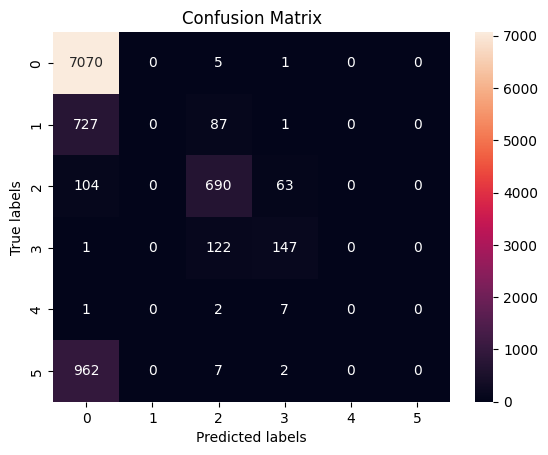

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

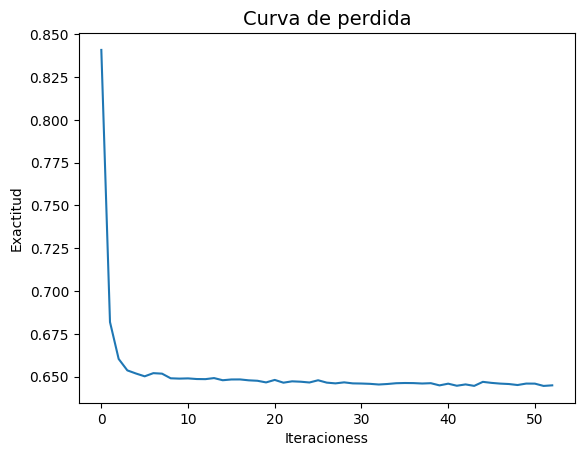

In [81]:
plt.plot(clasificacion.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Exactitud')
plt.show()

In [82]:
no_obs = np.array([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]) # Fetal de un individuo por
clasificacion.predict(no_obs)
# Causa de fallecimiento haya sido por accidente 9na columna 1
# El fallecimiento fue atendido por un auxiliar 3a colunma 1
# El peso fue de 1600 gr al momento de la defunción 15a columna 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['3'], dtype='<U1')

In [86]:
df.T_GES = df.T_GES.astype(str)
df.loc[(df.T_GES == "1"), 'T_GES'],  df.loc[(df.T_GES == "2"), 'T_GES'] = "< 22 sem", "22-27 sem"
df.loc[(df.T_GES == "3"), 'T_GES'], df.loc[(df.T_GES == "4"), 'T_GES'] = "28-37 sem", "38-41 sem"
df.loc[(df.T_GES == "5"), 'T_GES'], df.loc[(df.T_GES == "9"), 'T_GES'] = "> 42 sem", "Sin info"

<ipython-input-86-6a94247713a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.T_GES = df.T_GES.astype(str)


In [87]:
dffinal = pd.concat([dummia, dummib, dummic, df["T_GES"]], axis = 1)
dffinal.head(3)

,Médico,Enfermero,Auxiliar,Promotor,FuncionarioRG,Medico Legista,Natural,Homicidio,Accidente,Pendiente,...,< 1 Kg,1-1.5 Kg,1.5-2 Kg,2-2.5 Kg,2.5-3 Kg,3-3.5 Kg,3.5-4 Kg,> 4 Kg,Kg desco,T_GES
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,< 22 sem
11,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,< 22 sem
11,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22-27 sem


In [89]:
x1 = dffinal.drop("T_GES", axis = 1) # Mis variables explicativas
y1 = dffinal["T_GES"] # Mi variable respuesta
trainx1, testx1, trainy1, testy1 = train_test_split(x1, y1, test_size = 0.3)

In [90]:
clasificacion1 = MLPClassifier(hidden_layer_sizes= (14, 14, 14, 14, 14, 14, 14, 14, 14),
                               max_iter = 500, activation = "relu",
                               solver = 'adam')

In [93]:
clasificacion1.fit(trainx1, trainy1)
predicciony1 = clasificacion1.predict(testx1)

In [94]:
no_obs = np.array([[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]) # Fetal de un individuo por
clasificacion1.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['28-37 sem'], dtype='<U9')